In [168]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import datetime

dataname = "BRT"
data_path = f"../data/{dataname}/{dataname}.npz"
data = np.load(data_path)['data'] # (1464, 45)
station_list = ['第一码头', '开禾路口', '思北', '斗西路',
                '二市', '文灶', '金榜公园', '火车站',
                '莲坂', '龙山桥', '卧龙晓城', '东芳山庄',
                '洪文', '前埔枢纽站', '蔡塘', '金山', '市政务服务中心',
                '双十中学', '县后', '高崎机场', 'T4候机楼', '嘉庚体育馆',
                '诚毅学院', '华侨大学', '大学城', '产业研究院', '中科院',
                '东宅', '田厝', '厦门北站', '凤林', '东安', '后田', '东亭',
                '美峰', '蔡店', '潘涂', '滨海新城西柯枢纽', '官浔', '轻工食品园',
                '四口圳', '工业集中区', '第三医院', '城南', '同安枢纽']

data_path2 = f"../data/y_hat/GAF_{dataname}_prediction.npz"
data2 = np.load(data_path2)
x = data2["x"] # (246, 24, 45)
y = data2["y"] # (246, 24, 45)
y_hat = data2["y_hat"] # (246, 24, 45)
y_hat = np.where(y_hat < 0, 0, y_hat)


In [169]:
def get_random_sample(x, y, y_hat):
    num_samples, _, num_vertex = x.shape

    sample_idx = np.random.randint(num_samples)
    vertex_idx = np.random.randint(num_vertex)

    select_x = x[sample_idx, :, vertex_idx]
    select_y = y[sample_idx, :, vertex_idx]
    select_y_hat = y_hat[sample_idx, :, vertex_idx]

    return vertex_idx, select_x, select_y, select_y_hat


# vertex, x, y, y_hat = get_random_sample(x, y, y_hat)
# [24]

In [170]:
def plot_prediction(x, y, y_hat, vertex=0, T=24, fontname="Microsoft YaHei"):
    y=np.insert(y,0,x[-1])
    y_hat=np.insert(y_hat,0,x[-1])
    data = pd.DataFrame({
        '时间步': np.arange(T),  # 时间步
        '客流量': x,  # 流量数据
        '数据类型': np.repeat(['原始值'] * T, 1)  # 数据类型
    })
    data_y_hat = pd.DataFrame({
        '时间步': np.tile(np.arange(T-1, T*2),2),  # 时间步
        '客流量': np.concatenate((y, y_hat)),  # 流量数据
        '数据类型': np.repeat(['真实值'] * (T+1) + ['预测值'] * (T+1), 1)  # 数据类型
    })
    data = pd.concat([data, data_y_hat], ignore_index=True)
    # 使用 Seaborn 绘制图形
    plt.figure(figsize=(10,6))
    sns.set_theme(style='whitegrid',font=fontname)
    sns.lineplot(
            x='时间步',
            y='客流量',
            hue='数据类型',
            data=data,
            palette=['blue', 'green', 'red']
        )
    # SimHei黑体
    fontdic={"fontname":fontname}
    plt.xlabel('时间步', fontdict=fontdic)
    plt.ylabel('客流量', fontdict=fontdic)
    plt.title(f'厦门BRT客流量预测--{station_list[vertex]}站', fontdict=fontdic)
    plt.legend(title='数据类型', loc='upper right')
    plt.xticks(np.arange(T*2))
    plt.show()


# plot_prediction(x, y, y_hat)

In [171]:
def plot_brt_aweek(data):
    seq_len, vertex = data.shape
    node_index = np.random.randint(vertex)
    new_data = data[:,node_index]
    time_interval = datetime.timedelta(minutes=60)
    start_date = datetime.datetime(2023,4,1)
    # 记录每个时间步对应星期几
    day_of_week = np.zeros(seq_len, dtype=np.int32)
    for i in range(seq_len):
        current_date = start_date + i * time_interval
        day_of_week[i] = current_date.weekday() # 获取周几编号（0-6）
    # 生成随机连续一周的序列索引 [idx, idx+7*24]
    idx=0
    while True:
        idx=np.random.randint(61-7)
        if day_of_week[idx*24]==0:
            idx *= 24
            break
    
    print("idx=",idx)
    new_data = new_data[idx:(idx+7*24)]
    print(new_data.shape)
    print(new_data[:30])
    print(day_of_week[idx:idx+30])
    time_steps=np.arange(7*24)
    x_ticks_indices=np.arange(12,len(time_steps),24)
    x_ticks=time_steps[x_ticks_indices]
    x_labels=["星期一","星期二","星期三","星期四","星期五","星期六","星期日"]

    # SimHei黑体
    fontname="Microsoft YaHei"
    fontdic={"fontname":fontname}

    sns.set_theme(style="whitegrid", font=fontname)
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=time_steps, y=new_data)
    plt.xticks(x_ticks,x_labels,rotation=45)
    plt.title(f"厦门BRT客流量数据集 -- {station_list[node_index]}", fontdict=fontdic)
    plt.xlabel('时间', fontdict=fontdic)
    plt.ylabel('站点客流量', fontdict=fontdic)
    plt.legend()
    plt.show()

# print(data.shape)
# plot_brt_aweek(data)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


idx= 54
(24,)
[   0    0    0    0    0    3  348 1215 1324  474]


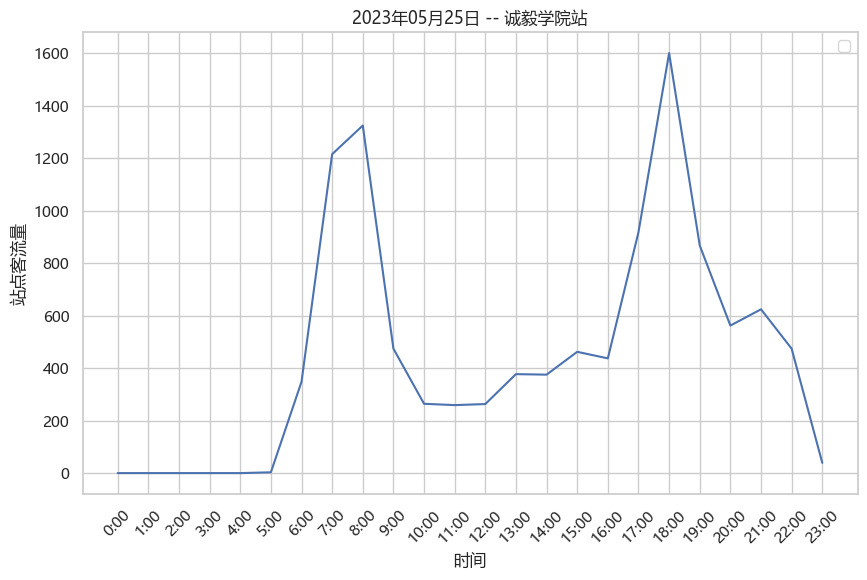

In [172]:
def plot_brt_day(data):
    seq_len, vertex = data.shape
    node_index = np.random.randint(vertex)
    new_data = data[:,node_index]
    time_interval = datetime.timedelta(minutes=60)
    start_date = datetime.datetime(2023,4,1)
    # 记录每个时间步对应星期几
    date1 = []
    for i in range(seq_len):
        current_date = start_date + i * time_interval
        date1.append(current_date.strftime("%Y年%m月%d日"))

    # 生成随机连续天的序列索引 [idx:idx+24]
    idx=np.random.randint(seq_len//24)
    str_date = date1[idx*24]
    print("idx=",idx)
    new_data = new_data[(idx*24):(idx*24+24)]
    print(new_data.shape)
    print(new_data[:10])
    time_steps=np.arange(24)
    x_labels = ['{}:00'.format(i) for i in range(24)]

    # SimHei黑体
    fontname="Microsoft YaHei"
    fontdic={"fontname":fontname}

    sns.set_theme(style="whitegrid", font=fontname)
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=time_steps, y=new_data)
    plt.xticks(time_steps,x_labels,rotation=45)
    plt.title(f"{str_date} -- {station_list[node_index]}站", fontdict=fontdic)
    plt.xlabel('时间', fontdict=fontdic)
    plt.ylabel('站点客流量', fontdict=fontdic)
    plt.legend()
    plt.show()

plot_brt_day(data)

In [173]:
def plot_prediction_aweek(data, y, y_hat, vertex=45, T=24, fontname="Microsoft YaHei"):
    node_index = np.random.randint(vertex)
    y_hat = y_hat[:,:,node_index]
    y = y[:,:,node_index]
    seq_len=1464
    test_step=293
    time_interval = datetime.timedelta(minutes=60)
    start_date = datetime.datetime(2023,4,1)
    # 记录每个时间步对应星期几
    day_of_week = np.zeros(seq_len, dtype=np.int32)
    for i in range(seq_len):
        current_date = start_date + i * time_interval
        day_of_week[i] = current_date.weekday() # 获取周几编号（0-6）
    day_of_week = day_of_week[-test_step:]
    print(day_of_week[53:])
    idx=53 # 周一起点
    # y_hat [samples=test_step-48+1=246, 24, vertex]
    # y_hat [samples=test_step-48+1=246, 24, vertex]
    real_y_hat=[]
    real_y=[]
    # y_hat[5,...]
    for i in range(5,5+7*24):
        real_y_hat.append(y_hat[i,-1])
        real_y.append(y[i,-1])
    

    time_steps=np.arange(7*24)
    x_ticks_indices=np.arange(12,len(time_steps),24)
    x_ticks=time_steps[x_ticks_indices]
    x_labels=["星期一","星期二","星期三","星期四","星期五","星期六","星期日"]
    fontdic={"fontname":fontname}

    sns.set_theme(style="whitegrid", font=fontname)
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=time_steps, y=real_y, color='red', label='真实值')
    sns.lineplot(x=time_steps, y=real_y_hat, color='green', label='预测值')
    plt.xticks(x_ticks,x_labels,rotation=45)
    plt.title(f"厦门BRT客流量预测 -- {station_list[node_index]}", fontdict=fontdic)
    plt.xlabel('时间', fontdict=fontdic)
    plt.ylabel('站点客流量', fontdict=fontdic)
    plt.legend()
    plt.show()


# plot_prediction_aweek(data, y, y_hat)
